In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pygeos
import alphashape
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from descartes import PolygonPatch
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, MultiPoint, Point

In [115]:
# research/toolpaper/plots/dbscanpubs13/samples/dbpubs_2013_15_1.csv

In [ ]:
df = pd.read_csv('../plots/dbscanpats13/samples/dbpats_2013_15_12.csv')

In [25]:
df = pd.read_csv('../plots/dbscanpats13/samples/dbpats_2013_15_12.csv')
# df = pd.read_csv('plots/dbscanpubs13/samples/dbpubs_2013_15_1.csv')
df = df[df['labels']!=-1]
X= df[df['cc']=='FR']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 10438 to 13378
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      368 non-null    int64  
 1   lat       368 non-null    float64
 2   lng       368 non-null    float64
 3   tec       368 non-null    int64  
 4   wgt       368 non-null    float64
 5   adminlat  368 non-null    float64
 6   adminlng  368 non-null    float64
 7   name      368 non-null    object 
 8   admin1    368 non-null    object 
 9   admin2    368 non-null    object 
 10  cc        368 non-null    object 
 11  radlat    368 non-null    float64
 12  radlng    368 non-null    float64
 13  minden    368 non-null    float64
 14  minpts    368 non-null    int64  
 15  labels    368 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 48.9+ KB


In [116]:
X[X.minpts>=25]

,year,lat,lng,tec,wgt,adminlat,adminlng,name,admin1,admin2,cc,radlat,radlng,minden,minpts,labels
10489,2013,43.5847,1.37635,12,1.0,43.63276,1.39399,Blagnac,Midi-Pyrenees,Departement de la Haute-Garonne,FR,0.760697,0.024022,0.036782,26,68
10493,2013,43.5864,1.40059,12,1.0,43.60426,1.44367,Toulouse,Midi-Pyrenees,Departement de la Haute-Garonne,FR,0.760726,0.024445,0.035368,25,68
11042,2013,45.0794,5.65994,12,1.0,45.07175,5.64247,Saint-Paul-de-Varces,Rhone-Alpes,Departement de l'Isere,FR,0.786784,0.098785,0.039612,28,70
11046,2013,45.0818,5.73014,12,1.0,45.06912,5.73225,Champ-sur-Drac,Rhone-Alpes,Departement de l'Isere,FR,0.786826,0.100010,0.043856,31,70
11055,2013,45.1124,5.75475,12,1.0,45.11732,5.75957,Jarrie,Rhone-Alpes,Departement de l'Isere,FR,0.787360,0.100439,0.056588,40,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,2013,48.9437,2.32859,12,1.0,48.93935,2.31478,Villeneuve-la-Garenne,Ile-de-France,Departement des Hauts-de-Seine,FR,0.854229,0.040642,0.127324,90,84
13274,2013,48.9482,2.19170,12,1.0,48.94820,2.19169,Sartrouville,Ile-de-France,Departement des Yvelines,FR,0.854307,0.038252,0.084883,60,84
13284,2013,48.9557,2.31474,12,1.0,48.95350,2.31514,Epinay-sur-Seine,Ile-de-France,Departement de Seine-Saint-Denis,FR,0.854438,0.040400,0.110347,78,84
13294,2013,48.9700,2.19625,12,1.0,48.97111,2.20491,Cormeilles-en-Parisis,Ile-de-France,Departement du Val-d'Oise,FR,0.854688,0.038332,0.065077,46,84


In [27]:
X.labels.unique()

array([68, 70, 74, 77, 81, 84])

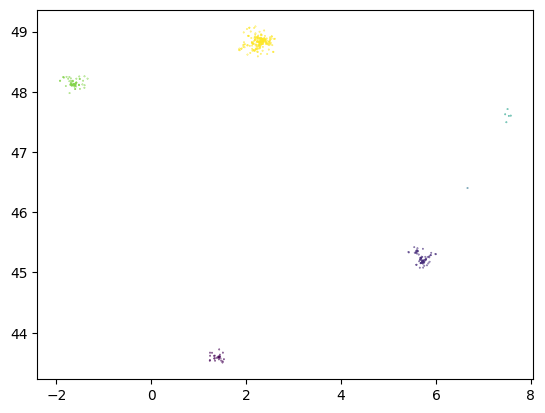

In [29]:
plt.scatter(X.lng, X.lat, c=X.labels, s=.1)
plt.show()

In [70]:
gdf = gpd.GeoDataFrame(X, 
                       columns=('lat','lng'),
                       geometry = gpd.points_from_xy(X['lng'], X['lat']),
                       crs='epsg:4326')
gdf['labels']=X.labels
gdf.head()

,lat,lng,geometry,labels
10438,43.5056,1.50111,POINT (1.50111 43.50560),68
10444,43.5222,1.50709,POINT (1.50709 43.52220),68
10459,43.5353,1.23341,POINT (1.23341 43.53530),68
10460,43.5362,1.34410,POINT (1.34410 43.53620),68
10461,43.5362,1.47507,POINT (1.47507 43.53620),68


In [72]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
gdf = gdf.to_crs("EPSG:32634")
print(gdf.crs)
myeps = 15

hulls = [] #A list to hold clusterids and convex hull geometries
for clusterid, frame in gdf.groupby('labels'): #For each cluster group except -1
    geom = frame.geometry.buffer(myeps*1000, 6).unary_union
    hulls.append([clusterid, geom])
    
df3 = pd.DataFrame.from_records(data=hulls, columns=['cluster','geometry'])
df3 = gpd.GeoDataFrame(data=df0, geometry=df0['geometry'], crs=gdf.crs)
df3 = df3.to_crs("epsg:4326")
df3.head()

EPSG:32634


,cluster,geometry
0,68,"POLYGON ((1.31320 43.27583, 1.29453 43.27792, ..."
1,70,"POLYGON ((5.65812 44.81470, 5.60960 44.81714, ..."
2,74,"POLYGON ((7.03834 46.46720, 7.04725 46.43300, ..."
3,77,"POLYGON ((7.84299 47.38765, 7.81915 47.35683, ..."
4,81,"POLYGON ((-1.45581 47.78974, -1.49476 47.76806..."


In [114]:
gdf

,lat,lng,geometry,labels,buffer
10438,43.5056,1.50111,"POLYGON ((-1062341.757 5005495.277, -1062852.8...",68,"POLYGON ((-1062341.757 5005495.277, -1062852.8..."
10444,43.5222,1.50709,"POLYGON ((-1061407.608 5007223.426, -1061918.7...",68,"POLYGON ((-1061407.608 5007223.426, -1061918.7..."
10459,43.5353,1.23341,"POLYGON ((-1083194.933 5014121.385, -1083706.0...",68,"POLYGON ((-1083194.933 5014121.385, -1083706.0..."
10460,43.5362,1.34410,"POLYGON ((-1074214.763 5012010.934, -1074725.8...",68,"POLYGON ((-1074214.763 5012010.934, -1074725.8..."
10461,43.5362,1.47507,"POLYGON ((-1063618.554 5009412.742, -1064129.6...",68,"POLYGON ((-1063618.554 5009412.742, -1064129.6..."
...,...,...,...,...,...
13354,49.0428,2.01748,"POLYGON ((-868248.704 5608264.926, -868759.816...",84,"POLYGON ((-868248.704 5608264.926, -868759.816..."
13366,49.0612,2.16841,"POLYGON ((-856798.164 5607464.498, -857309.277...",84,"POLYGON ((-856798.164 5607464.498, -857309.277..."
13367,49.0637,2.06563,"POLYGON ((-864165.996 5609662.267, -864677.109...",84,"POLYGON ((-864165.996 5609662.267, -864677.109..."
13369,49.0643,2.06904,"POLYGON ((-863902.085 5609664.391, -864413.197...",84,"POLYGON ((-863902.085 5609664.391, -864413.197..."


<AxesSubplot: >

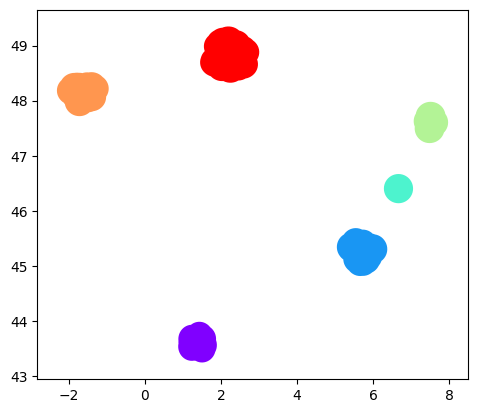

In [111]:
df3.plot(cmap='rainbow')

In [73]:
gdf = gdf.to_crs("EPSG:32634")
gdf.crs

<Derived Projected CRS: EPSG:32634>
Name: WGS 84 / UTM zone 34N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°E and 24°E, northern hemisphere between equator and 84°N, onshore and offshore. Albania. Belarus. Bosnia and Herzegovina. Bulgaria. Central African Republic. Chad. Croatia. Democratic Republic of the Congo (Zaire). Estonia. Finland. Greece. Hungary. Italy. Kosovo. Latvia. Libya. Lithuania. Montenegro. North Macedonia. Norway, including Svalbard and Bjornoys. Poland. Romania. Russian Federation. Serbia. Slovakia. Sudan. Sweden. Ukraine.
- bounds: (18.0, 0.0, 24.0, 84.0)
Coordinate Operation:
- name: UTM zone 34N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

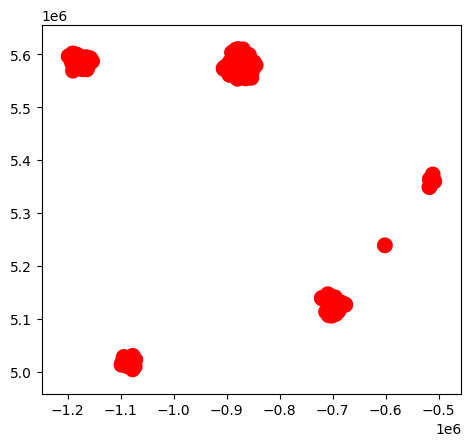

In [82]:
r_km = 6378.137
myeps = 15
radius = myeps /r_km 
gdf['buffer'] = gdf.geometry.buffer(myeps*1000, 6)
gdf['buffer'].plot(color='red')

In [105]:
buffers = gpd.GeoSeries(gdf['buffer'])
boundary = gpd.GeoSeries(buffers.unary_union)
boundary

0    MULTIPOLYGON (((-1202922.941 5561745.049, -120...
dtype: geometry

In [107]:
for c in X.labels.unique():
    print(c)
    buffers = gpd.GeoSeries(gdf[gdf['labels']==c]['buffer']).unary_union
    print(buffers)
    

68
POLYGON ((-1096714.7626342743 4999020.55248552, -1097043.691884787 4999272.948776574, -1098194.9325798848 4999121.38506374, -1102077.2182564226 4999632.497669404, -1105694.9325798848 5001131.0040069735, -1108801.534297683 5003514.783345942, -1111185.3136366513 5006621.38506374, -1112683.8199742208 5010239.099387202, -1113194.9325798848 5014121.38506374, -1112683.8199742208 5018003.670740278, -1111185.3136366513 5021621.38506374, -1110868.9210821313 5022033.715868569, -1110552.2145579527 5022798.313054533, -1110395.394707978 5023002.684661985, -1110419.068806685 5023182.507294605, -1109907.956201021 5027064.792971143, -1109083.9544334302 5029054.10921388, -1108599.2467015132 5032735.829962058, -1107100.7403639436 5036353.54428552, -1104716.9610249754 5039460.146003318, -1101610.3593071771 5041843.925342287, -1097992.644983715 5043342.431679856, -1094110.3593071771 5043853.54428552, -1090228.0736306394 5043342.431679856, -1088097.0270930838 5042459.723301953, -1086873.478486858 504229

,lat,lng,geometry,labels
10438,43.5056,1.50111,POINT (1.50111 43.50560),68
10444,43.5222,1.50709,POINT (1.50709 43.52220),68
10459,43.5353,1.23341,POINT (1.23341 43.53530),68
10460,43.5362,1.34410,POINT (1.34410 43.53620),68
10461,43.5362,1.47507,POINT (1.47507 43.53620),68


In [53]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/tmp/ipykernel_1605483/3414175560.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.buffer(radius).plot(color='red')


<AxesSubplot: >

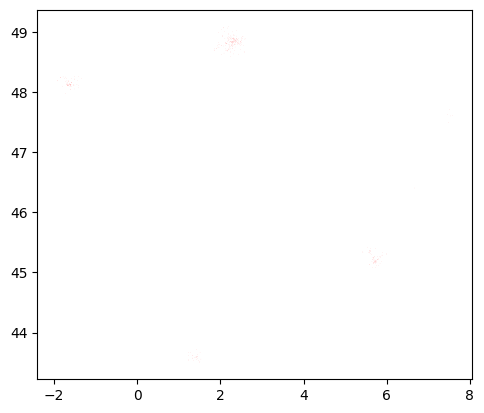

In [54]:
r_km = 6378.137
myeps = 15
radius = myeps /r_km 

gdf.geometry.buffer(radius).plot(color='red')



# polygons
## Convex hull

In [7]:
dbdf = gpd.GeoDataFrame(X, columns=('lat','lon'))
dbdf['geometry'] = None
# Create a Shapely polygon from the coordinate-tuple list
geometry = gpd.points_from_xy(dbdf['lon'], dbdf['lat'])
# geometry

In [8]:
# Let's see what we have
# print(poly)
# Insert the polygon into 'geometry' -column at index 0
dbdf.loc[:, 'geometry'] = geometry
# Let's see what we have now
print(dbdf)
# dbdf = pd.DataFrame(X, columns=('lat','lon'))
dbdf['labels']=labels
dbdf.head()

          lat       lon                   geometry
0    0.494261  1.451067    POINT (1.45107 0.49426)
1   -1.428081 -0.837064  POINT (-0.83706 -1.42808)
2    0.338559  1.038759    POINT (1.03876 0.33856)
3    0.119001 -1.053976   POINT (-1.05398 0.11900)
4    1.122425  1.774937    POINT (1.77494 1.12242)
..        ...       ...                        ...
745  0.505927  1.213927    POINT (1.21393 0.50593)
746 -1.640461 -0.469973  POINT (-0.46997 -1.64046)
747 -0.057139 -0.909261  POINT (-0.90926 -0.05714)
748 -1.169394  0.039597   POINT (0.03960 -1.16939)
749  0.263230 -0.926499   POINT (-0.92650 0.26323)

[750 rows x 3 columns]


/tmp/ipykernel_974270/99906731.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dbdf.loc[:, 'geometry'] = geometry


,lat,lon,geometry,labels
0,0.494261,1.451067,POINT (1.45107 0.49426),0
1,-1.428081,-0.837064,POINT (-0.83706 -1.42808),1
2,0.338559,1.038759,POINT (1.03876 0.33856),0
3,0.119001,-1.053976,POINT (-1.05398 0.11900),2
4,1.122425,1.774937,POINT (1.77494 1.12242),0


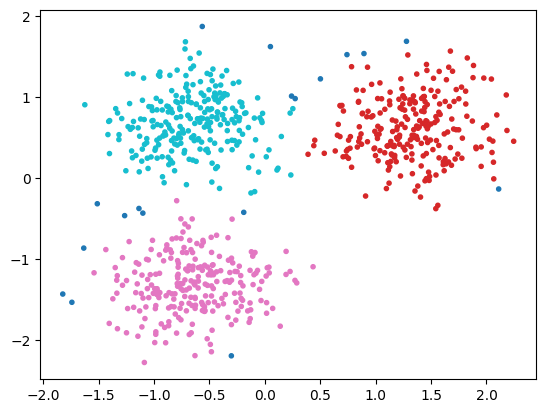

In [9]:
#Adjust eps and plot until it looks as good as possible
fig, ax = plt.subplots()
ax.scatter(x=dbdf['lon'], y=dbdf['lat'], c=dbdf['labels'], marker='.', cmap='tab10')

In [151]:
#Create convex hulls from each cluster (alpha=0)
alpha = 0
hulls = [] #A list to hold clusterids and convex hull geometries
for clusterid, frame in dbdf.loc[dbdf['labels']!=-1].groupby('labels'): #For each cluster group except -1
    geom = alphashape.alphashape(frame.geometry,alpha)
    hulls.append([clusterid, geom])
df0 = pd.DataFrame.from_records(data=hulls, columns=['cluster','geometry'])
df0 = gpd.GeoDataFrame(data=df0, geometry=df0['geometry'], crs=dbdf.crs)
df0.head()

,cluster,geometry
0,0,"POLYGON ((1.54300 -0.37672, 0.90920 -0.22116, ..."
1,1,"POLYGON ((-1.08752 -2.27447, -1.40452 -1.79245..."
2,2,"POLYGON ((-0.12543 -0.18358, -0.90926 -0.05714..."


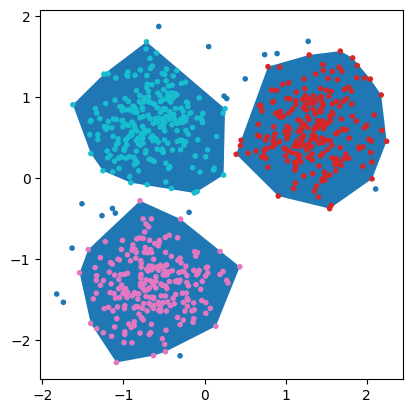

In [152]:
df0.plot()
plt.scatter(x=dbdf['lon'], y=dbdf['lat'], c=dbdf['labels'], marker='.', cmap='tab10')

## Concave hull fix alpha

In [153]:
#Create concave hulls from each cluster for given alpha
alpha = 3
hulls = [] #A list to hold clusterids and convex hull geometries
for clusterid, frame in dbdf.loc[dbdf['labels']!=-1].groupby('labels'): #For each cluster group except -1
    geom = alphashape.alphashape(frame.geometry,alpha)
    hulls.append([clusterid, geom])
df1 = pd.DataFrame.from_records(data=hulls, columns=['cluster','geometry'])
df1 = gpd.GeoDataFrame(data=df1, geometry=df1['geometry'], crs=dbdf.crs)
df1.head()

,cluster,geometry
0,0,"POLYGON ((1.29063 1.51905, 1.67458 1.56678, 1...."
1,1,"POLYGON ((-1.33022 -1.85805, -1.40452 -1.79245..."
2,2,"POLYGON ((-1.18972 1.28829, -0.94672 1.30821, ..."


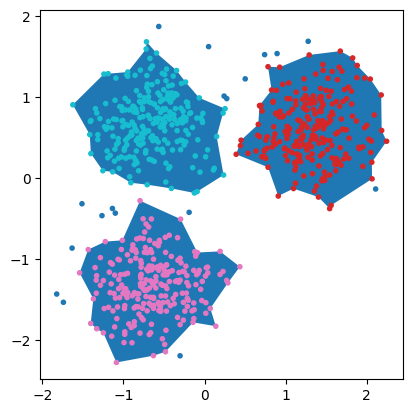

In [154]:
df1.plot()
plt.scatter(x=dbdf['lon'], y=dbdf['lat'], c=dbdf['labels'], marker='.', cmap='tab10')

## Concave hull varyning alpha

In [155]:
#Create concave hulls from each cluster
uberhulls = [] #A list to hold clusterids and convex hull geometries
for clusterid, frame in dbdf.loc[dbdf['labels']!=-1].groupby('labels'): #For each cluster group except -1
    curpts = frame.labels.count()
    alphacheck = False
    alpha = 0
    while alphacheck == False:
        hulls = []
        geom = alphashape.alphashape(frame.geometry, alpha)
        hulls.append([clusterid, geom])
        curpoly = pd.DataFrame.from_records(data=hulls, columns=['cluster','geometry'])
        curpoly = gpd.GeoDataFrame(data=curpoly, geometry=curpoly['geometry'], crs=dbdf.crs)        
        ptsinpoly = gpd.sjoin(curpoly, frame).cluster.count() #Spatial join Points to polygons
        print(clusterid, alpha, curpts, ptsinpoly, (ptsinpoly/curpts*100))
        if ptsinpoly<curpts:
            alphacheck = True
            uberhulls.append([clusterid, prevgeom])
        else:
            alpha = alpha + .5
            prevgeom = geom

df2 = pd.DataFrame.from_records(data=uberhulls, columns=['cluster','geometry'])
df2 = gpd.GeoDataFrame(data=df2, geometry=df2['geometry'], crs=dbdf.crs)

0 0 243 243 100.0
0 0.5 243 243 100.0
0 1.0 243 243 100.0
0 1.5 243 243 100.0
0 2.0 243 243 100.0
0 2.5 243 243 100.0
0 3.0 243 243 100.0
0 3.5 243 243 100.0
0 4.0 243 243 100.0
0 4.5 243 243 100.0
0 5.0 243 243 100.0
0 5.5 243 241 99.1769547325103
1 0 244 244 100.0
1 0.5 244 244 100.0
1 1.0 244 244 100.0
1 1.5 244 244 100.0
1 2.0 244 244 100.0
1 2.5 244 244 100.0
1 3.0 244 244 100.0
1 3.5 244 244 100.0
1 4.0 244 244 100.0
1 4.5 244 244 100.0
1 5.0 244 244 100.0
1 5.5 244 244 100.0
1 6.0 244 244 100.0
1 6.5 244 243 99.59016393442623
2 0 245 245 100.0
2 0.5 245 245 100.0
2 1.0 245 245 100.0
2 1.5 245 245 100.0
2 2.0 245 245 100.0
2 2.5 245 245 100.0
2 3.0 245 245 100.0
2 3.5 245 245 100.0
2 4.0 245 245 100.0
2 4.5 245 245 100.0
2 5.0 245 245 100.0
2 5.5 245 245 100.0
2 6.0 245 245 100.0
2 6.5 245 241 98.36734693877551


In [156]:
df2.head()

,cluster,geometry
0,0,"POLYGON ((0.78305 0.13395, 0.70598 0.26270, 0...."
1,1,"POLYGON ((-1.33022 -1.85805, -1.40452 -1.79245..."
2,2,"POLYGON ((-0.14628 0.12849, -0.42799 0.14033, ..."


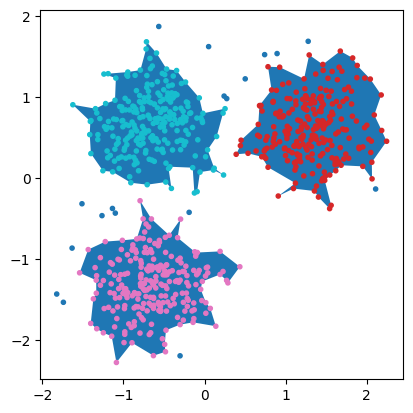

In [157]:
df2.plot()
plt.scatter(x=dbdf['lon'], y=dbdf['lat'], c=dbdf['labels'], marker='.', cmap='tab10')

# Compare shapes

In [161]:
df0.area

0    2.614865
1    2.593232
2    2.371477
dtype: float64

In [162]:
df1.area

0    2.361822
1    2.282452
2    2.176870
dtype: float64

In [163]:
df2.area

0    2.022711
1    1.900095
2    1.794160
dtype: float64

In [166]:
merged = gpd.overlay(df0, df1, how='intersection')
merged.area/df0.area

0    0.903229
1    0.880157
2    0.917938
dtype: float64

In [167]:
merged = gpd.overlay(df0, df2, how='intersection')
merged.area/df0.area

0    0.773543
1    0.732713
2    0.756558
dtype: float64

In [168]:
df2.area/df0.area

0    0.773543
1    0.732713
2    0.756558
dtype: float64